In [5]:
# Read the data from the file q-gdpmc1.txt
data <- read.table("q-gdpmc1.txt", header = TRUE)

# Add log transformation of GDP per capita to data
data$log_gdp <- log(data$gdp)

# Add first differencing of log GDP per capita to data
data$growth_rate <- c(NA, diff(data$log_gdp))

#Display the first few rows of the data
print(head(data))

  year month day     gdp  log_gdp   growth_rate
1 1947     1   1 1770691 14.38688            NA
2 1947     4   1 1767976 14.38535 -0.0015344764
3 1947     7   1 1766523 14.38452 -0.0008221816
4 1947    10   1 1793310 14.39957  0.0150498664
5 1948     1   1 1821809 14.41534  0.0157668892
6 1948     4   1 1855345 14.43358  0.0182406991



Call:
arima(x = na.omit(data$growth_rate), order = c(3, 0, 0))

Coefficients:
         ar1     ar2      ar3  intercept
      0.3476  0.1282  -0.1122     0.0077
s.e.  0.0612  0.0644   0.0613     0.0009

sigma^2 estimated as 8.17e-05:  log likelihood = 864.45,  aic = -1718.9
AIC:  -1718.903 
BIC:  -1701.042 


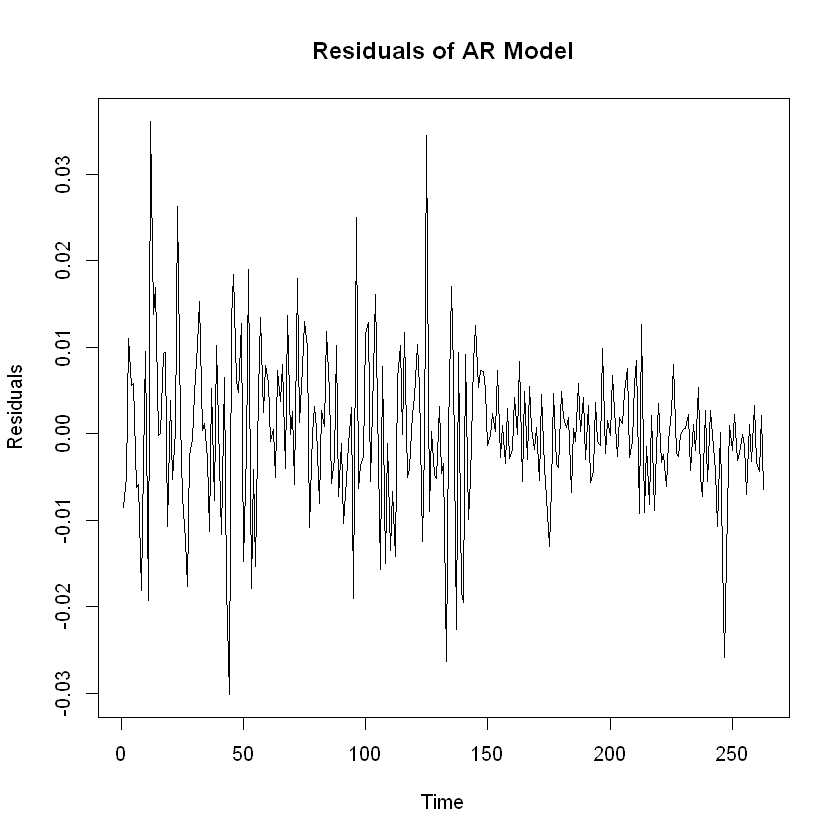


	Box-Ljung test

data:  residuals(ar_model)
X-squared = 19.99, df = 20, p-value = 0.4586


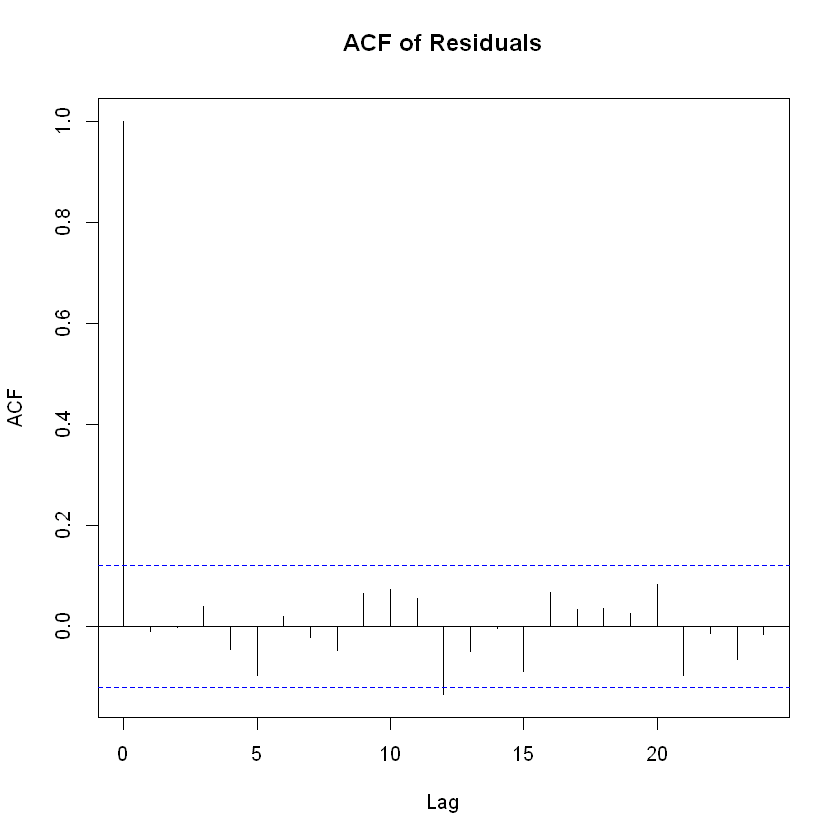

In [6]:
# Load necessary libraries
library(stats)

# Fit an AR model to the growth rate series
ar_model <- arima(na.omit(data$growth_rate), order = c(3, 0, 0)) # AR(3) model

# Display the fitted model
print(ar_model)

# Display AIC and BIC values
cat("AIC: ", AIC(ar_model), "\n")
cat("BIC: ", BIC(ar_model), "\n")

# Plot residuals
plot(residuals(ar_model), main="Residuals of AR Model", ylab="Residuals")

# Plot ACF of residuals
acf(residuals(ar_model), main="ACF of Residuals")

# Perform Ljung-Box test
Box.test(residuals(ar_model), lag=20, type="Ljung-Box")


In [7]:
# Extract AR coefficients
ar_coefficients <- ar_model$coef[1:3]

# Form the characteristic polynomial
characteristic_polynomial <- c(1, -ar_coefficients)

# Find the roots of the polynomial
roots <- polyroot(characteristic_polynomial)

# Display the roots
print(roots)

# Analyze the roots
modulus <- Mod(roots)
cat("Modulus of the roots:", modulus, "\n")

phi1 <- 2*1.657814
phi2 <- -1 * (1.657814^2 + 1.164277^2)

c = phi1/(2*sqrt(-1 * phi2))
# Calculate the business cycle frequency
k = 2*pi/acos(c)
y = ceiling(k/4)

cat("Business cycle frequency:", k, " quarters = ", y, "years (approx) \n")

[1]  1.657814+1.164277e+00i -2.172531+5.506659e-15i  1.657814-1.164277e+00i
Modulus of the roots: 2.025805 2.172531 2.025805 
Business cycle frequency: 10.26219  quarters =  3 years (approx) 


In [8]:
# Assuming ar_model is already fitted to the data
# Generate 1-step to 8-step ahead forecasts
forecasts <- predict(ar_model, n.ahead = 8)

# Extract point forecasts and standard errors
point_forecasts <- forecasts$pred
standard_errors <- forecasts$se

# Calculate 99% confidence intervals
alpha <- 0.01
z_value <- qnorm(1 - alpha / 2)
lower_bounds <- point_forecasts - z_value * standard_errors
upper_bounds <- point_forecasts + z_value * standard_errors

# Display the results
forecast_results <- data.frame(
  Step = 1:8,
  PointForecast = point_forecasts,
  LowerBound99 = lower_bounds,
  UpperBound99 = upper_bounds
)

print(forecast_results)

  Step PointForecast LowerBound99 UpperBound99
1    1   0.005880335  -0.01740250   0.02916317
2    2   0.006228356  -0.01842120   0.03087791
3    3   0.007733294  -0.01758914   0.03305573
4    4   0.007747671  -0.01757863   0.03307397
5    5   0.007906583  -0.01741972   0.03323288
6    6   0.007794875  -0.01753847   0.03312822
7    7   0.007774803  -0.01755986   0.03310947
8    8   0.007735680  -0.01759953   0.03307089
